In [1]:
import os
import cv2
from time import time
import numpy as np
from sklearn.utils import shuffle

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 6]

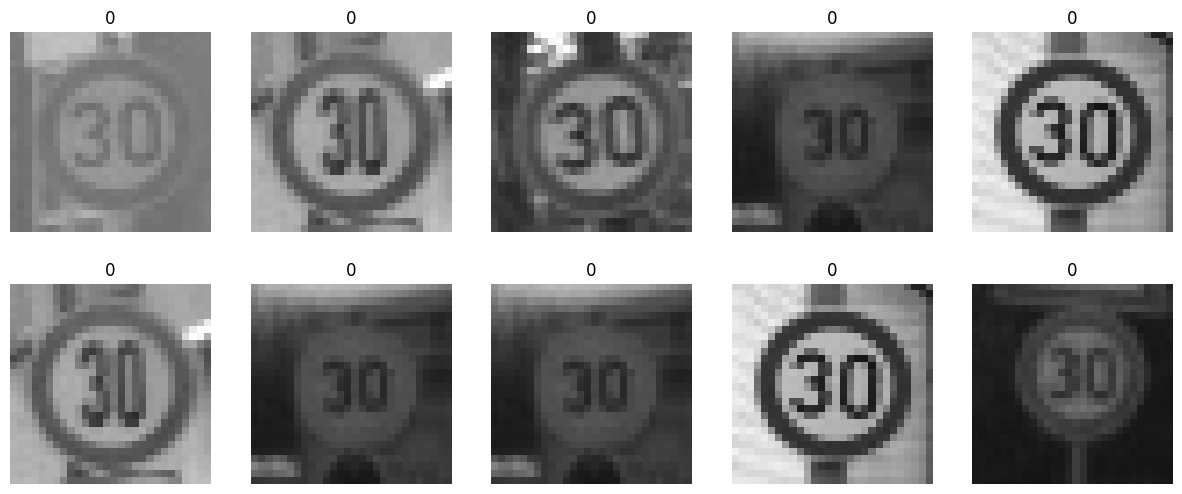

In [3]:
# Load traffic sign class 0
fnames_0 = os.listdir(os.path.join('101'))
images_0 = [cv2.imread(os.path.join('101', f), cv2.IMREAD_UNCHANGED) for f in fnames_0]
labels_0 = [0] * len(images_0)

for cnt, idx in enumerate(np.random.randint(0, len(images_0), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_0[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_0[idx]), plt.axis(False)

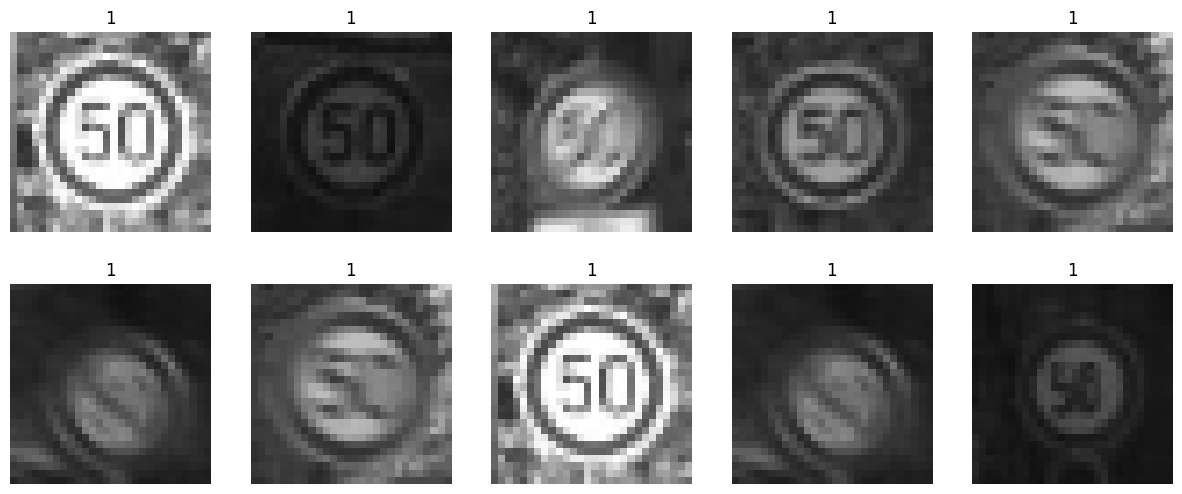

In [4]:
# Load traffic sign class 1
fnames_1 = os.listdir(os.path.join('102'))
images_1 = [cv2.imread(os.path.join( '102', f), cv2.IMREAD_UNCHANGED) for f in fnames_1]
labels_1 = [1] * len(images_1)

for cnt, idx in enumerate(np.random.randint(0, len(images_1), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_1[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_1[idx]), plt.axis(False)

In [5]:
print('Num samples class_0', len(images_0))
print('Num samples class_1', len(images_1))

Num samples class_0 20
Num samples class_1 21


In [6]:
# Put both classes together and shuffle the data
images = images_0 + images_1
labels = labels_0 + labels_1
images, labels = shuffle(images, labels)

images = np.array(images)
labels = np.array(labels)

print('Images', images.shape)
print('Labels', labels.shape)

Images (41, 28, 28)
Labels (41,)


In [7]:
start = time()
pixels = []
for image in images:
    pixels_ = []
    for r in range(image.shape[0]):
        for c in range(image.shape[1]):
            pixels_.append(image[r,c])
    pixels.append(pixels_)
    
pixels = np.array(pixels)/255
stop = time()

print('Shape', pixels.shape)
print('Elapsed time', stop - start)

Shape (41, 784)
Elapsed time 0.019939661026000977


In [8]:
start = time()
pixels = np.array([image.flatten() for image in images])/255
stop = time()

print('Shape', pixels.shape)
print('Elapsed time', stop - start)

Shape (41, 784)
Elapsed time 0.0024099349975585938


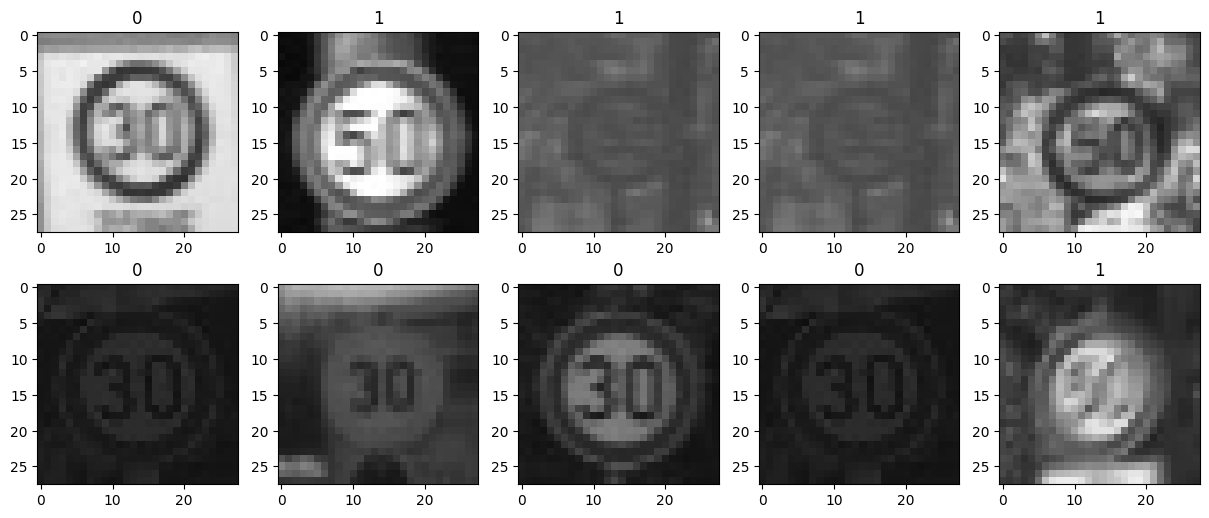

In [9]:
for cnt, idx in enumerate(np.random.randint(0, len(images), 10)):    
    plt.subplot(2,5,cnt+1)
    plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels[idx])

In [10]:
# Put both classes together and shuffle the data
images = images_0 + images_1
labels = labels_0 + labels_1
images, labels = shuffle(images, labels)

images = np.array(images)
labels = np.array(labels)

print('Images', images.shape)
print('Labels', labels.shape)

Images (41, 28, 28)
Labels (41,)


In [11]:
start = time()
pixels = []
for image in images:
    pixels_ = []
    for r in range(image.shape[0]):
        for c in range(image.shape[1]):
            pixels_.append(image[r,c])
    pixels.append(pixels_)
    
pixels = np.array(pixels)/255
stop = time()

print('Shape', pixels.shape)
print('Elapsed time', stop - start)

Shape (41, 784)
Elapsed time 0.013348102569580078


In [12]:
start = time()
pixels = np.array([image.flatten() for image in images])/255
stop = time()

print('Shape', pixels.shape)
print('Elapsed time', stop - start)

Shape (41, 784)
Elapsed time 0.0009949207305908203


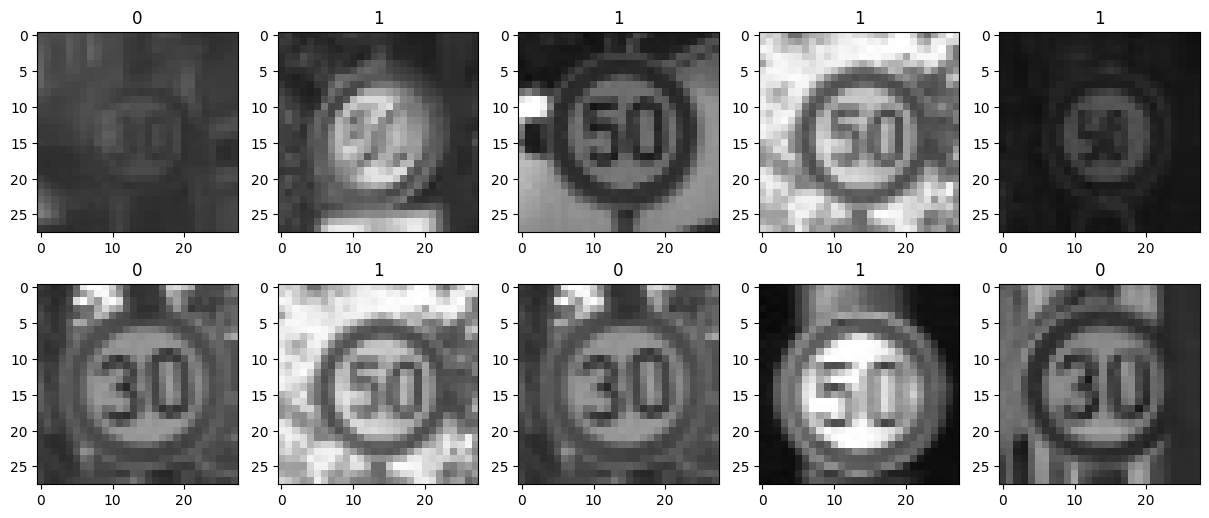

In [13]:
for cnt, idx in enumerate(np.random.randint(0, len(images), 10)):    
    plt.subplot(2,5,cnt+1)
    plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels[idx])

In [14]:
!pip install tensorflow

In [15]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input

In [17]:
inputs = Input(shape=(784,))
outputs = Dense(1, activation="linear")(inputs)
model = Model(inputs, outputs)

In [18]:
tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [19]:
!pip install pydot

In [20]:
tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [21]:
model.compile(optimizer ='adam', loss = 'mean_squared_error')

In [22]:
history = model.fit(pixels, labels, epochs=10, batch_size=32)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0359  
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4698
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5167
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7134
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7378
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5200
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4178
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4625
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4683
Epoch 10/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4274


(Text(0.5, 0, 'epoch'), Text(0, 0.5, 'loss'))

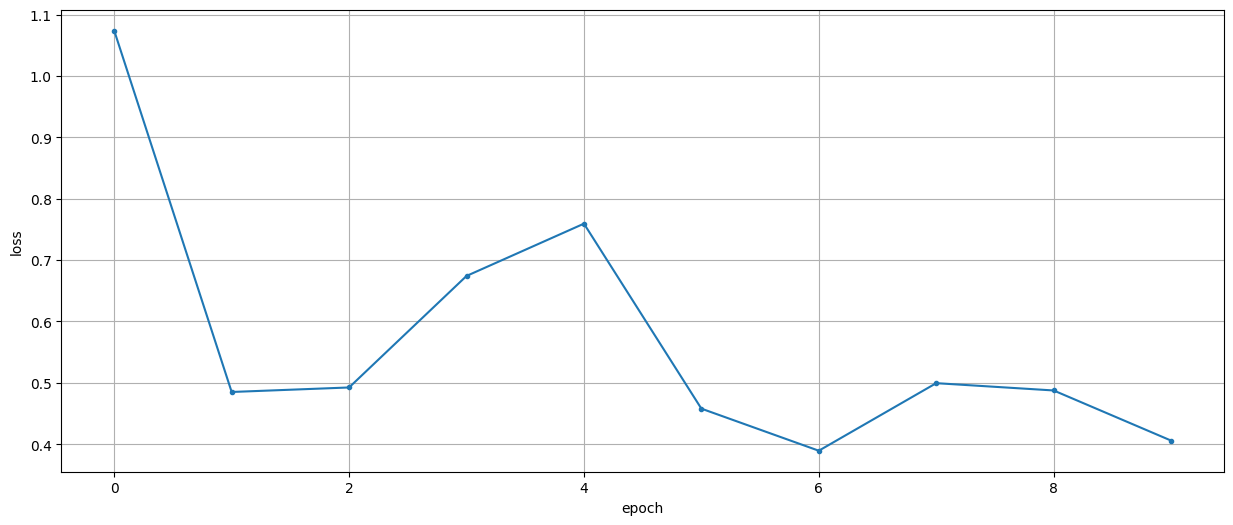

In [23]:
# Plot training history
h = history.history
epochs = range(len(h['loss']))
plt.plot(epochs, h['loss'], '.-'), plt.grid(True)
plt.xlabel('epoch'), plt.ylabel('loss')

[0.00641238] [0.00641238]


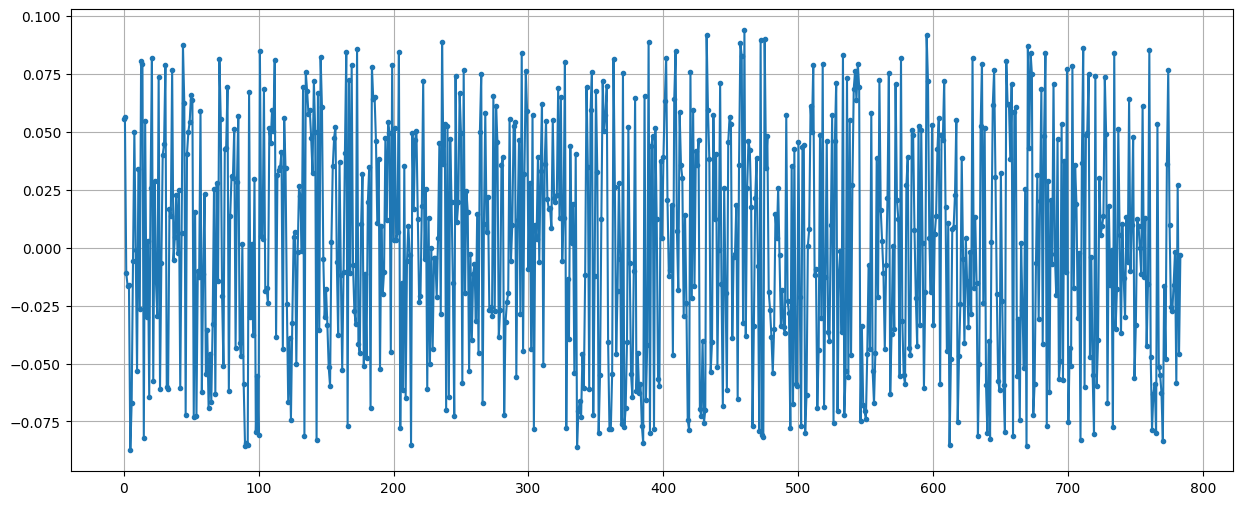

In [24]:
# Let's also have a looks at the learnt weights
plt.plot(model.layers[1].weights[0].numpy(), '.-'), plt.grid(True)
print(model.layers[1].weights[1].numpy(), model.layers[1].bias.numpy())

In [26]:
idx = 10
pred = model.predict(pixels[idx:idx+1, ...])
print(pred, labels[idx])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[[0.15419585]] 0


In [27]:
# Run it on the entire dataset
predictions = model.predict(pixels).squeeze()
predictions = predictions > 0.5

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [28]:
correct = 0
for prediction, label in zip(predictions, labels):
    if prediction == label:
        correct = correct + 1

print('Accuracy', correct/len(labels))

Accuracy 0.4878048780487805


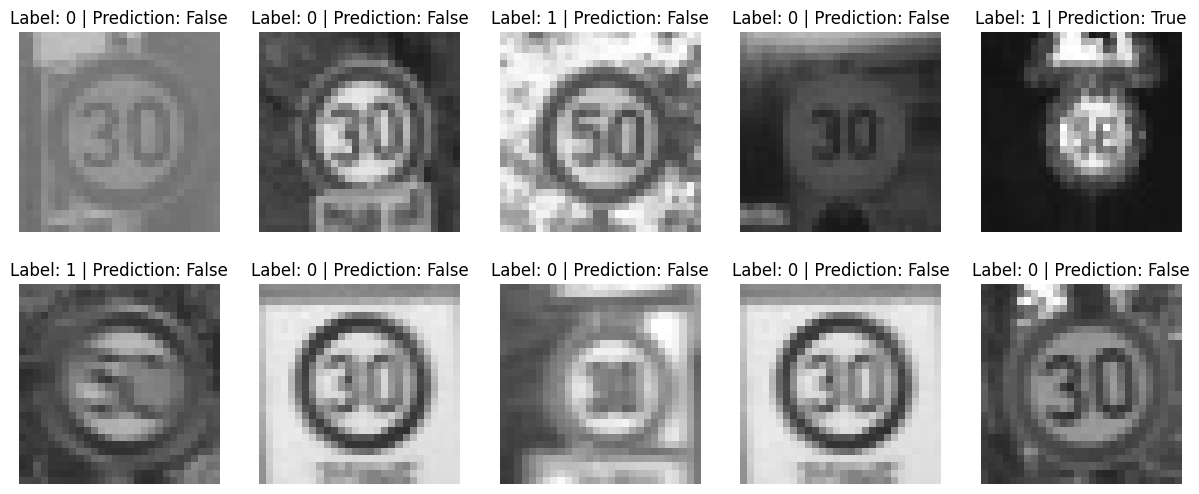

In [29]:
for cnt, idx in enumerate(np.random.randint(0, len(images), 10)): 
    plt.subplot(2,5,cnt+1), plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
    plt.title('Label: ' + str(labels[idx]) + ' | Prediction: ' + str(predictions[idx]))
    plt.axis(False)